In [1]:
import os
os.chdir('../..')

In [57]:
import comet_ml
from comet_ml.query import Parameter, Metric
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
comet_api = comet_ml.api.API()
    
query = (Parameter('model_loss') == 'smooth') & (Parameter('model_loss_a1') != None) & (Metric('mupo_NR-R-PCK') != None)
exps = comet_api.query('pose-refinement', '02-batch-shuffle-pretrained', query)

In [59]:
def get_values(m):
    value = [float(d['metricValue']) for d in m]
    step = [d['step'] for d in m]
    epoch = [d['epoch'] for d in m]
    return value, step, epoch

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

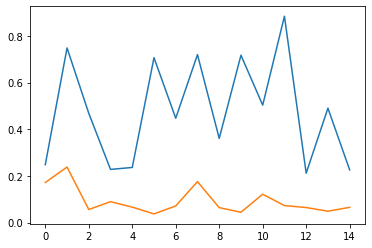

In [60]:
for exp in exps:
    for m in ['e_pred', 'e_smooth_small', 'e_smooth_large']:
        e_smooth_small = exp.get_metrics(m)
        value, step, epoch = get_values(e_smooth_small)
        df = pd.DataFrame({'value': value, 'step': step, 'epoch':epoch})
        plt.plot([df[df.epoch == e].value.iloc[0] for e in range(epoch[-1]+1)], label=m)
    plt.legend()
    plt.show()

In [61]:
[df[df.epoch == e].value.iloc[0] for e in range(epoch[-1]+1)]

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'